### HW 4 Problem 4

In [1]:
%matplotlib inline
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import math
delta = 0.025
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np 
import matplotlib 
from sklearn.svm import SVC
import scipy.io as sio ## sio.loadmat from sklearn.model_selection import KFold
from sklearn.model_selection import KFold
import sklearn 
from sklearn.metrics import accuracy_score
from pylab import pcolor, show, colorbar, xticks, yticks
import math
from sklearn import preprocessing
import random
mpl.rc('savefig', dpi=100) #The matplotlib.rc() command can be used to modify multiple settings in a single group at once, using keyword arguments:
plt.style.use('ggplot') #ggplot is a popular theme for charting

In [2]:
## Importing and processing data 

In [3]:
wine_data=sio.loadmat("data.mat")


In [4]:
wine_train_shuffle= np.concatenate((wine_data["X"],  wine_data["y"]), axis=1)
np.random.shuffle(wine_train_shuffle)

In [5]:
wine_train_x=wine_train_shuffle[:,:-1]
wine_train_y=wine_train_shuffle[:,-1]
(wine_train_y.shape[0])


6000

##### Probme 5: Part 1: Batch Gradient Descent 

In [7]:
## Insert markdown image for batch gradient descent : Refer shewchuck notes 


In [8]:
# Function to perform Batch Gradient Descent (all point):
np.random.seed(0)

def gradient_estimator(s): 
    ## Function that returns a derivative of the cost function
    y,s, x=data
    gradient = (y-s)*x
    return gradient

def score_func(score):
    return (1.0/(1.0+ np.exp(-score)))

def prediction_score(data, weights, y):
    score=np.dot(data, weights)
    s=np.apply_along_axis(score_func,0, score)
    clas=np.around(s)
    return (np.mean(clas==y))
    
    
def BGD(data,labels, lr=0.01, reg_param=0.01, iterations=1000):
    # fictitious dimesion 
    data= np.concatenate((data,np.ones(data.shape[0]).reshape(data.shape[0],1)), axis=1)
    valid_dat=data[5600:,:]
    #data=data[:5600,:]
    y=labels
    valid_y=y[5600:]
    #y=y[:5600]
    mu, sigma = 0, 0.1
    weights= np.random.normal(mu, sigma, data.shape[1])    # Initilize with  random weights near zero 
    ## training 
    prior_loss=0
    count=0
    cost=[]
    while count<=iterations:
        weight_prior=weights
        z=np.dot(data, weights)
        s=np.apply_along_axis(score_func,0, z)
        loss=(1.0/data.shape[0])*(np.sum(np.dot(y,np.log(s))+np.dot((np.ones(y.shape)-y),(np.ones(s.shape[0])-s)))+ reg_param*(np.linalg.norm(weights)**2)) 
        cost.append(loss)
        gradient=1.0/data.shape[0]*np.dot(data.T,(y-s))+2*reg_param*weights
        weights=weights+lr*gradient
        pred_acc=prediction_score(valid_dat, weights,valid_y)
        count+=1
    return (weights, pred_acc, cost)     
        
        
        
    

In [9]:

# Cross validation 
c_v_bgd={}
for lr in [0.000001, 0.00001,0.0001,0.001,0.01,0.1,1]:
    for reg_param in [0.0001, 0.001,0.01,0, 1, 10]:
        learn=BGD(wine_train_x, wine_train_y, lr, reg_param)
        print ".... lr = %s, reg_param =%s, accuracy= %s" %(lr, reg_param, learn[1])
        c_v_bgd[learn[1]]=(lr, reg_param)
        






.... lr = 1e-06, reg_param =0.0001, accuracy= 0.63
.... lr = 1e-06, reg_param =0.001, accuracy= 0.7675
.... lr = 1e-06, reg_param =0.01, accuracy= 0.82
.... lr = 1e-06, reg_param =0, accuracy= 0.7675
.... lr = 1e-06, reg_param =1, accuracy= 0.7675
.... lr = 1e-06, reg_param =10, accuracy= 0.7625
.... lr = 1e-05, reg_param =0.0001, accuracy= 0.7325
.... lr = 1e-05, reg_param =0.001, accuracy= 0.77
.... lr = 1e-05, reg_param =0.01, accuracy= 0.7675
.... lr = 1e-05, reg_param =0, accuracy= 0.885
.... lr = 1e-05, reg_param =1, accuracy= 0.7675
.... lr = 1e-05, reg_param =10, accuracy= 0.7725
.... lr = 0.0001, reg_param =0.0001, accuracy= 0.895
.... lr = 0.0001, reg_param =0.001, accuracy= 0.8725
.... lr = 0.0001, reg_param =0.01, accuracy= 0.865
.... lr = 0.0001, reg_param =0, accuracy= 0.85
.... lr = 0.0001, reg_param =1, accuracy= 0.9225
.... lr = 0.0001, reg_param =10, accuracy= 0.745
.... lr = 0.001, reg_param =0.0001, accuracy= 0.9375
.... lr = 0.001, reg_param =0.001, accuracy= 0.945

/Users/suren/anaconda/envs/python2/lib/python2.7/site-packages/ipykernel/__main__.py:11: RuntimeWarning: overflow encountered in exp
/Users/suren/anaconda/envs/python2/lib/python2.7/site-packages/ipykernel/__main__.py:38: RuntimeWarning: divide by zero encountered in log


.... lr = 0.001, reg_param =10, accuracy= 0.9025
.... lr = 0.01, reg_param =0.0001, accuracy= 0.935
.... lr = 0.01, reg_param =0.001, accuracy= 0.9325
.... lr = 0.01, reg_param =0.01, accuracy= 0.88
.... lr = 0.01, reg_param =0, accuracy= 0.955
.... lr = 0.01, reg_param =1, accuracy= 0.93
.... lr = 0.01, reg_param =10, accuracy= 0.685
.... lr = 0.1, reg_param =0.0001, accuracy= 0.9525
.... lr = 0.1, reg_param =0.001, accuracy= 0.87
.... lr = 0.1, reg_param =0.01, accuracy= 0.94
.... lr = 0.1, reg_param =0, accuracy= 0.85
.... lr = 0.1, reg_param =1, accuracy= 0.7675


/Users/suren/anaconda/envs/python2/lib/python2.7/site-packages/ipykernel/__main__.py:38: RuntimeWarning: overflow encountered in double_scalars
/Users/suren/anaconda/envs/python2/lib/python2.7/site-packages/ipykernel/__main__.py:40: RuntimeWarning: overflow encountered in multiply


.... lr = 0.1, reg_param =10, accuracy= 0.0
.... lr = 1, reg_param =0.0001, accuracy= 0.875
.... lr = 1, reg_param =0.001, accuracy= 0.94
.... lr = 1, reg_param =0.01, accuracy= 0.93
.... lr = 1, reg_param =0, accuracy= 0.9425


/Users/suren/anaconda/envs/python2/lib/python2.7/site-packages/ipykernel/__main__.py:41: RuntimeWarning: overflow encountered in add


.... lr = 1, reg_param =1, accuracy= 0.0
.... lr = 1, reg_param =10, accuracy= 0.0


In [10]:
    #Finding values for the best parameters
    lr, reg_param=c_v_bgd[sorted(c_v_bgd)[-1]]
    learn=BGD(wine_train_x, wine_train_y,lr , reg_param, 4000)


(-3, 2)

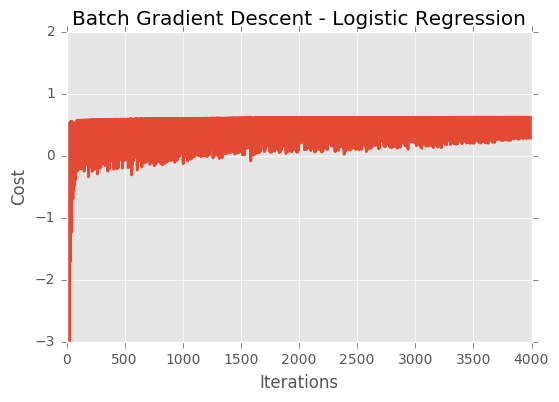

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
iterations=np.arange(4001)
cost= np.asarray(learn[2]) #Scaled the values of cost to fit the plot 
plt.plot(iterations, cost, linewidth=2.0, label="training")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Batch Gradient Descent - Logistic Regression")
plt.ylim(-3, 2)

##### Part 2 

In [28]:
# Function to perform Batch Gradient Descent (all point):
np.random.seed(0)

def gradient_estimator(s): 
    ## Function that returns a derivative of the cost function
    y,s, x=data
    gradient = (y-s)*x
    return gradient

def score_func(score):
    return (1.0/(1.0+ np.exp(-score)))

def prediction_score(data, weights, y):
    score=np.dot(data, weights)
    s=np.apply_along_axis(score_func,0, score)
    clas=np.around(s)
    return (np.mean(clas==y))
    
    
def SGD(data,labels, lr=0.01, reg_param=0.01, iterations=1000):
    # fictitious dimesion 
    data= np.concatenate((data,np.ones(data.shape[0]).reshape(data.shape[0],1)), axis=1)
    valid_dat=data[5600:,:]
    data=data[:5600,:]
    y=labels
    valid_y=y[5600:]
    y=y[:5600]
    mu, sigma = 0, 0.1
    weights= np.random.normal(mu, sigma, data.shape[1])    # Initilize with  random weights near zero 
    ## training 
    prior_loss=0
    count=0
    cost=[]
    while count<=iterations:
        weight_prior=weights
        randomizer=np.random.choice(data.shape[0],1)
        data=data[randomizer]
        y=y[randomizer]
        z=np.dot(data, weights)
        s=score_func(z)
        loss=(np.sum(np.dot(y,np.log(s))+np.dot((np.ones(y.shape)-y),(np.ones(s.shape[0])-s)))+ reg_param*(np.linalg.norm(weights)**2)) 
        cost.append(loss)
        gradient=1.0/data.shape[0]*np.dot(data.T,(y-s))+2*reg_param*weights
        weights=weights+lr*gradient
        pred_acc=prediction_score(valid_dat, weights,valid_y)
        count+=1
    return (weights, pred_acc, cost)     
        
        

In [29]:
c_v_sgd={}
for lr in [0.000001, 0.00001,0.0001,0.001,0.01,0.1,1]:
    for reg_param in [0.0001, 0.001,0.01,0, 1, 10, 100]:
        learn=SGD(wine_train_x, wine_train_y, lr, reg_param)
        print ".... lr = %s, reg_param =%s, accuracy= %s" %(lr, reg_param, learn[1])
        c_v_sgd[learn[1]]=(lr, reg_param)
        



.... lr = 1e-06, reg_param =0.0001, accuracy= 0.8475
.... lr = 1e-06, reg_param =0.001, accuracy= 0.2325
.... lr = 1e-06, reg_param =0.01, accuracy= 0.225
.... lr = 1e-06, reg_param =0, accuracy= 0.2325
.... lr = 1e-06, reg_param =1, accuracy= 0.7675
.... lr = 1e-06, reg_param =10, accuracy= 0.8325
.... lr = 1e-06, reg_param =100, accuracy= 0.165
.... lr = 1e-05, reg_param =0.0001, accuracy= 0.7675
.... lr = 1e-05, reg_param =0.001, accuracy= 0.7675
.... lr = 1e-05, reg_param =0.01, accuracy= 0.7675
.... lr = 1e-05, reg_param =0, accuracy= 0.7675
.... lr = 1e-05, reg_param =1, accuracy= 0.875
.... lr = 1e-05, reg_param =10, accuracy= 0.7675
.... lr = 1e-05, reg_param =100, accuracy= 0.2275
.... lr = 0.0001, reg_param =0.0001, accuracy= 0.775
.... lr = 0.0001, reg_param =0.001, accuracy= 0.7675
.... lr = 0.0001, reg_param =0.01, accuracy= 0.7675
.... lr = 0.0001, reg_param =0, accuracy= 0.2325
.... lr = 0.0001, reg_param =1, accuracy= 0.7675
.... lr = 0.0001, reg_param =10, accuracy= 0.

/Users/suren/anaconda/envs/python2/lib/python2.7/site-packages/ipykernel/__main__.py:11: RuntimeWarning: overflow encountered in exp
/Users/suren/anaconda/envs/python2/lib/python2.7/site-packages/ipykernel/__main__.py:41: RuntimeWarning: divide by zero encountered in log


.... lr = 0.0001, reg_param =100, accuracy= 0.73
.... lr = 0.001, reg_param =0.0001, accuracy= 0.2325
.... lr = 0.001, reg_param =0.001, accuracy= 0.7925
.... lr = 0.001, reg_param =0.01, accuracy= 0.2325
.... lr = 0.001, reg_param =0, accuracy= 0.7675
.... lr = 0.001, reg_param =1, accuracy= 0.7675
.... lr = 0.001, reg_param =10, accuracy= 0.7675
.... lr = 0.001, reg_param =100, accuracy= 0.7675
.... lr = 0.01, reg_param =0.0001, accuracy= 0.77
.... lr = 0.01, reg_param =0.001, accuracy= 0.82
.... lr = 0.01, reg_param =0.01, accuracy= 0.7675
.... lr = 0.01, reg_param =0, accuracy= 0.2325
.... lr = 0.01, reg_param =1, accuracy= 0.7675
.... lr = 0.01, reg_param =10, accuracy= 0.7675


/Users/suren/anaconda/envs/python2/lib/python2.7/site-packages/ipykernel/__main__.py:41: RuntimeWarning: overflow encountered in double_scalars
/Users/suren/anaconda/envs/python2/lib/python2.7/site-packages/ipykernel/__main__.py:43: RuntimeWarning: overflow encountered in multiply


.... lr = 0.01, reg_param =100, accuracy= 0.0
.... lr = 0.1, reg_param =0.0001, accuracy= 0.7675
.... lr = 0.1, reg_param =0.001, accuracy= 0.2325
.... lr = 0.1, reg_param =0.01, accuracy= 0.7675
.... lr = 0.1, reg_param =0, accuracy= 0.7675
.... lr = 0.1, reg_param =1, accuracy= 0.2325
.... lr = 0.1, reg_param =10, accuracy= 0.0
.... lr = 0.1, reg_param =100, accuracy= 0.0
.... lr = 1, reg_param =0.0001, accuracy= 0.7675
.... lr = 1, reg_param =0.001, accuracy= 0.2325
.... lr = 1, reg_param =0.01, accuracy= 0.7675
.... lr = 1, reg_param =0, accuracy= 0.7675
.... lr = 1, reg_param =1, accuracy= 0.0


/Users/suren/anaconda/envs/python2/lib/python2.7/site-packages/ipykernel/__main__.py:44: RuntimeWarning: overflow encountered in add


.... lr = 1, reg_param =10, accuracy= 0.0
.... lr = 1, reg_param =100, accuracy= 0.0


In [30]:
#Finding values for the best parameters
lr, reg_param=c_v_sgd[sorted(c_v_sgd)[-1]]
learn_sgd=SGD(wine_train_x, wine_train_y,lr , reg_param, 1000)



(-10, 10)

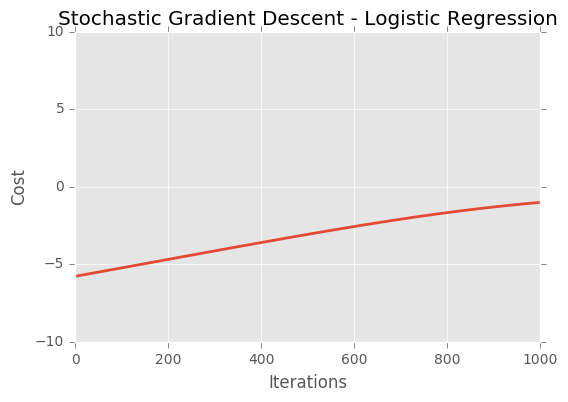

In [33]:
scaler = MinMaxScaler()
iterations=np.arange(1001)
cost= np.asarray(learn_sgd[2])#Scaled the values of cost to fit the plot 
plt.plot(iterations, cost, linewidth=2.0, label="training")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Stochastic Gradient Descent - Logistic Regression")
plt.ylim(-10, 10)

There can be certain level of Oscillations in terms of cost as Batch gradient descent approaches 
convergence, while SGD is much smoother and monotonic

In [327]:
## write comment 

#### Part 3: Varying epsilon

In [48]:
def SGD_var(data,labels, alpha, lr=0.01, reg_param=0.01, iterations=10000):
    # fictitious dimesion 
    data= np.concatenate((data,np.ones(data.shape[0]).reshape(data.shape[0],1)), axis=1)
    valid_dat=data[5600:,:]
    data=data[:5600,:]
    y=labels
    valid_y=y[5600:]
    y=y[:5600]
    mu, sigma = 0, 0.1
    weights= np.random.normal(mu, sigma, data.shape[1])    # Initilize with  random weights near zero 
    ## training 
    prior_loss=0
    lr_decay=[]
    cost=[]
    count=1
    while count<=iterations:
        weight_prior=weights
        randomizer=np.random.choice(data.shape[0],1)
        data=data[randomizer]
        y=y[randomizer]
        z=np.dot(data, weights)
        s=score_func(z)
        loss=(np.sum(np.dot(y,np.log(s))+np.dot((np.ones(y.shape)-y),(np.ones(s.shape[0])-s)))+ reg_param*(np.linalg.norm(weights)**2)) 
        cost.append(loss)
        lr_decay.append(lr)
        gradient=1.0/data.shape[0]*np.dot(data.T,(y-s))+2*reg_param*weights
        weights=weights+lr*gradient
        pred_acc=prediction_score(valid_dat, weights,valid_y)
        lr=lr/(1+alpha*count)
        count+=1
    return (weights, pred_acc, cost, lr_decay, alpha )     
        
          
    


In [64]:
c_v_sgd_var={}
for lr in [0.000001, 0.00001,0.0001,0.001,0.01,0.1,1]:
    for reg_param in [0.0001, 0.001,0.01, 1, 10, 100]:
            for alpha in [0.001, 0.01, 1, 2, 100, 1000]:
                learn=SGD_var(wine_train_x, wine_train_y,alpha, lr, reg_param)
                if learn[1]>0.8:
                    print ".... lr = %s, reg_param =%s, , alpha=%s, accuracy= %s" %(lr, reg_param,alpha, learn[1])
                    c_v_sgd_var[learn[1]]=(lr, reg_param, alpha)
                else:
                    pass
        

.... lr = 1e-06, reg_param =1, , alpha=2, accuracy= 0.8275
.... lr = 1e-06, reg_param =10, , alpha=1, accuracy= 0.81
.... lr = 1e-06, reg_param =10, , alpha=1000, accuracy= 0.845
.... lr = 1e-06, reg_param =100, , alpha=2, accuracy= 0.8525
.... lr = 1e-05, reg_param =0.0001, , alpha=1, accuracy= 0.875
.... lr = 1e-05, reg_param =0.0001, , alpha=2, accuracy= 0.8175
.... lr = 1e-05, reg_param =0.001, , alpha=0.001, accuracy= 0.8325
.... lr = 0.0001, reg_param =0.0001, , alpha=0.001, accuracy= 0.885
.... lr = 0.0001, reg_param =0.01, , alpha=100, accuracy= 0.9275
.... lr = 0.0001, reg_param =1, , alpha=1000, accuracy= 0.9175
.... lr = 0.0001, reg_param =10, , alpha=2, accuracy= 0.8575
.... lr = 0.0001, reg_param =10, , alpha=1000, accuracy= 0.81
.... lr = 0.001, reg_param =0.0001, , alpha=1, accuracy= 0.8025
.... lr = 0.001, reg_param =0.01, , alpha=0.01, accuracy= 0.825
.... lr = 0.01, reg_param =1, , alpha=1000, accuracy= 0.825


/Users/suren/anaconda/envs/python2/lib/python2.7/site-packages/ipykernel/__main__.py:11: RuntimeWarning: overflow encountered in exp
/Users/suren/anaconda/envs/python2/lib/python2.7/site-packages/ipykernel/__main__.py:23: RuntimeWarning: divide by zero encountered in log


.... lr = 0.01, reg_param =10, , alpha=1, accuracy= 0.8075
.... lr = 0.01, reg_param =100, , alpha=0.001, accuracy= 0.8175
.... lr = 1, reg_param =0.01, , alpha=2, accuracy= 0.83


/Users/suren/anaconda/envs/python2/lib/python2.7/site-packages/ipykernel/__main__.py:23: RuntimeWarning: overflow encountered in double_scalars


In [67]:
#Finding values for the best parameters
lr, reg_param, alpha=c_v_sgd_var[sorted(c_v_sgd_var)[-1]]
learn_sgd_var=SGD_var(wine_train_x, wine_train_y,alpha, lr , reg_param, 10000)



#### Part 5 : Kaggle

In [86]:
data=wine_data["X_test"]
data= np.concatenate((data,np.ones(data.shape[0]).reshape(data.shape[0],1)), axis=1)


data.shape


(497, 13)

In [87]:
## Spam 


def prediction_s(data, weights):
    score=np.dot(data, weights)
    s=np.apply_along_axis(score_func,0, score)
    clas=np.around(s)
    return clas
    
#Finding values for the best parameters
lr, reg_param=c_v_bgd[sorted(c_v_bgd)[-1]]
learn=BGD(wine_train_x, wine_train_y,lr , 0, 20000)
pred=prediction_s(data, learn[0])



In [88]:
id=0
data=[["id","Category"]]
for i in pred:
    bb=[id, int(i)]
    data.append(bb)
    id+=1
print len(data)

498


In [89]:
import csv
with open("kaggle4.csv", "w") as output:
    writer = csv.writer(output, lineterminator='\n')
    writer.writerows(data)

### Kaggle Score : 0.94758
Username: Surendran Subbiah

### Problem 1 

In [3]:
### Part 4.a


In [5]:
import numpy as np

## Adding number one as a bias trick 
X = np.array([[0,3,1],    
              [1,3,1],
              [0,1,1],
              [1,1,1]])
y = np.array([1,1,0,0])
w_o = np.array([-2,1,0])

In [13]:
def s(x, w):
    x_w= np.dot(x,w)
    scores=[]
    for i in x_w:
        sc=1/1+ np.exp(-i)
        scores.append(sc)
    return scores

In [14]:
s_0= s(X, w_o)

In [15]:
s_0

[1.0497870683678638,
 1.3678794411714423,
 1.3678794411714423,
 3.7182818284590451]

In [16]:
## Part 4.b

In [28]:
def gradient(w_t, x, y, reg_param):
    s_1=s(x,w_t)
    graadient=-np.dot(x.T, (y-s_1))+ reg_param* w_t
    update=w_t+ graadient
    return update
    

In [29]:
w_1=gradient(w_o, X, y, 0.07)

In [30]:
w_1

array([ 1.94616127,  7.4091608 ,  5.50382778])

In [31]:
### Part 4.c:


In [32]:
s_1=s(X, w_1)

In [33]:
s_1

[1.0000000000009046, 1.0000000000001292, 1.000002465814011, 1.0000003521706959]

In [34]:
## Part 4. d:


In [35]:
w_2=gradient(w_1, X, y, 0.07)

In [36]:
w_2

array([ 3.08239291,  9.92780487,  7.88909854])

### Problem 5

There is inconsistency the feature added by Daniel. He has choosen to add milliseconds as feature. However there is a wide wide deviations in magnitude and range of the feature. Millisconds values as they approach the midnight will be way higher of several thosands while the milliseconds after midnight will be around 0 and so on. This variation in magnitude may be a reason for lack of improvement in prediction by the classifer after having adding the feature. He can mitigate this issue by either binning time slots. In this instance 23:30 to 00:30 can be  bin and following that every hour can be a bin. He can also. Since he has observed that there is a very visible spike near midnight, he can transform the timestamps to binary features indicating 1 for anything between 23:30 to 00:30  and 0 otherwise. Now that his feature issue has been taken care of, he can proceed with trying linear as well as quadratic kernel and choose one that gives better test accuracy in predicting SPAM or HAM